In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

In [2]:
parameter = scipy.io.loadmat('../data/parameterestimate.mat')
alpha = parameter['alpha']

/Users/qingyao/anaconda3/envs/geo/lib/python3.11/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [3]:
parameter['beta'].shape

(3142, 100, 315)

In [5]:
alpha_mean = np.mean(alpha,axis=1) ## 3142

In [6]:
real_data_path = '/Users/qingyao/OneDrive - cumc.columbia.edu/machine_learning_data/'
cases = pd.read_csv(real_data_path + 'county_data/ts_covid19_confirmed_US_mainland.csv')

In [7]:
dates_col = cases.columns[40:41+315] 

In [8]:
dates_col

Index(['2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20',
       '2/26/20', '2/27/20', '2/28/20', '2/29/20',
       ...
       '12/22/20', '12/23/20', '12/24/20', '12/25/20', '12/26/20', '12/27/20',
       '12/28/20', '12/29/20', '12/30/20', '12/31/20'],
      dtype='object', length=316)

In [9]:
daily_cases =  np.diff(np.array(cases[dates_col]))

In [ ]:
### there are 3108 fips in the mainland 
### 3142 fips when i do the simulations
### need to compare them and find the intersection

In [10]:
fips_all = pd.read_csv('../data/testfips.csv')
fips_main = pd.read_csv(real_data_path+'county_data/fips_mainland.csv',names=['FIPS'])
mask = fips_all.FIPS.isin(fips_main.FIPS.values)
indices_main = mask[lambda x: x==True].index.tolist()
main_df = fips_all.loc[indices_main]

In [25]:
len(fips_main)

3108

In [15]:
## select alpha of the main
alpha_mean_main = alpha_mean[indices_main,:]
estimated_daily_infections = daily_cases/alpha_mean_main

In [16]:
pop = np.loadtxt('pop_new.csv') 
pop_main = pop[indices_main]

In [17]:
estimated_infec_perpop = estimated_daily_infections/pop_main[:,None]*100000
county_real = np.sum(estimated_infec_perpop>5,axis=0)
county_real10 = np.sum(estimated_infec_perpop>10,axis=0)

In [23]:
np.savetxt('estimated_daily_infections.csv', estimated_daily_infections)

In [18]:
df_county = pd.DataFrame(county_real[:63])
df_county['Date'] = pd.date_range('2020-02-21',periods=63)
df_county.set_index('Date',inplace=True)
df_county.rename(columns={0:'5'},inplace=True)

In [19]:
df_county10 = pd.DataFrame(county_real10[:63])
df_county10['Date'] = pd.date_range('2020-02-21',periods=63)
df_county10.set_index('Date',inplace=True)
df_county10.rename(columns={0:'10'},inplace=True)

In [ ]:
# df_county.to_csv('df_num_couties_5.csv')
df_county10.to_csv('df_num_couties_10.csv')

Text(0, 0.5, 'counties with daily infections per 100000>')

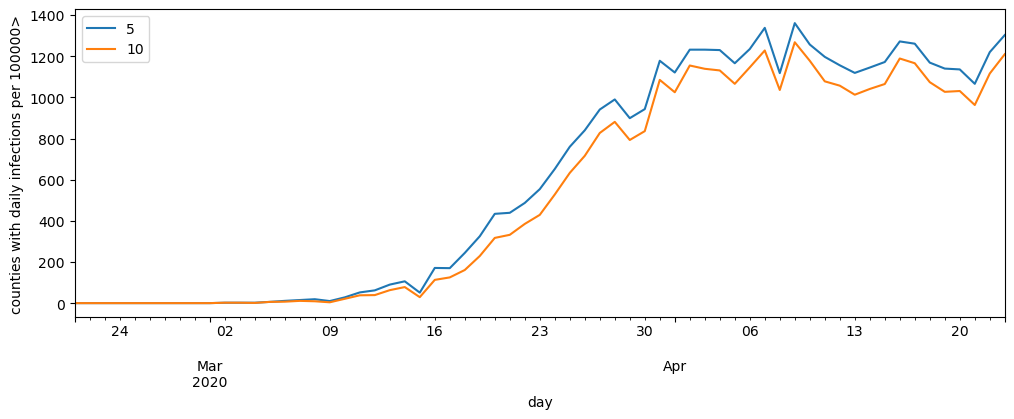

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
# for r_idx in range(9):
#     r = rs[r_idx]
#     mean_county1 =  E_mean_county[r_idx]
#     std_county1 = E_std_county[r_idx]
#     plt.plot(mean_county1,label='r={}'.format(r))
#     plt.fill_between(range(60),mean_county1-std_county1,mean_county1 +std_county1,alpha=0.1)

df_county.plot(ax=ax)
df_county10.plot(ax=ax)
# plt.plot(county_ode,label='metapopulation',color='red')
# plt.plot(county_real,label='estimated_real',color='black')

plt.legend()
plt.xlabel('day')
plt.ylabel('counties with daily infections per 100000>')
# plt.xlim(0,60)
# plt.ylim(-1,40)

In [ ]:
for d_i in range(11):
    n_c = np.sum(estimated_daily_infections[:,:d_i]>1)
    print('day_indices:',d_i,'number of counties cases estimated,',n_c)

In [ ]:
for d_i in range(1,15):
    potential_seed = list(np.where(estimated_daily_infections[:,d_i]>1)[0])
    fips_seed_idx = fips_main.loc[potential_seed].FIPS.values
    print('****************************************')
    for seed_idx in fips_seed_idx:
        print (fips_all[fips_all.FIPS==seed_idx])

In [ ]:
for d_i in range(1,15):
    potential_seed2 = list(np.where(estimated_infec_perpop[:,d_i]>1)[0])
    fips_seed_idx2 = fips_main.loc[potential_seed2].FIPS.values
    print('****************************************')
    for seed_idx in fips_seed_idx2:
        print (fips_all[fips_all.FIPS==seed_idx])

In [ ]:
## chose four of them 

In [ ]:
fips_all[fips_all.STATE == 22]